# Example of neuron rotations

This example shows how you can define a vector field to determine how the neurons should be rotated based on their position. The z-axis of the neuron morphology is rotated to coincide with the vector specified at that position, for intermediate positions a linear interpolation of the rotation vector is done. In addition there is an optional rotation around the z-axis.



The rotation field is specified in [```data/RotationFieldExample.json```](data/RotationFieldExample.json). Note that since our mesh files use micrometers as units (legacy from Allen Institute), we also use micrometers to specify the position in the rotation field to make it easier to match up. The rotation file contains a block for each volume, specifying ```position``` and corresponding ```rotation```.

```
{
    "Striatum" : {

        "position" : [[0.0, 0.0, 0.0],
                      [0.0, 0.0, 1.0],
                      [0.0, 1.0, 0.0],
                      [0.0, 1.0, 1.0],
                      [1.0, 0.0, 0.0],
                      [1.0, 0.0, 1.0],
                      [1.0, 1.0, 0.0],
                      [1.0, 1.0, 1.0]],

        "rotation" : [[-1.0, -1.0, -1.0],
                      [-1.0, -1.0, 1.0],
                      [-1.0, 1.0, -1.0],
                      [-1.0, 1.0, 1.0],
                      [1.0, -1.0, -1.0],
                      [1.0, -1.0, 1.0],
                      [1.0, 1.0, -1.0],
                      [1.0, 1.0, 1.0]]
    }
}
```

Below we create a cube mesh to match the rotation field.

In [1]:
import os
from snudda.place import create_cube_mesh

network_path = os.path.join("networks", "rotation_example")
mesh_file = os.path.join(network_path, "mesh", "cube_volume.obj")

create_cube_mesh(mesh_file, [500e-6,500e-6, 500e-6], 900e-6, "Cube for rotation example")

When specifying the ```rotation_mode``` we have used ```vectorField```, which means the z-axis of the neuron is aligned with the vector field. If we also want a random rotation around the neuron's Z-axis, we instead set ```vectorFieldAndZ```. The default rotation mode is ```random```. To have no rotation mode, set it to ```none``` (or ```""```).

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="Striatum", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

real_neuron_dir = os.path.join("$DATA","neurons","striatum","dspn")  # Use this instead for real morphologies
fake_neuron_dir = os.path.join("data", "example_morph")  # Easier to see rotations with ball and stick

si.add_neurons(name="dSPN", num_neurons=200, volume_id="Striatum",
               neuron_dir=fake_neuron_dir)

rotation_field_file = os.path.join("data","RotationFieldExample.json")

si.define_rotation(volume_id="Striatum", neuron_type="dSPN", 
                   rotation_mode="vectorField",
                   rotation_field_file=rotation_field_file)

si.write_json()

Adding neurons: dSPN from dir data/example_morph
Parameter file not found: data/example_morph/ballanddoublestickz/parameters.json
Mechanism file not found: data/example_morph/ballanddoublestickz/mechanisms.json
Writing networks/rotation_example/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

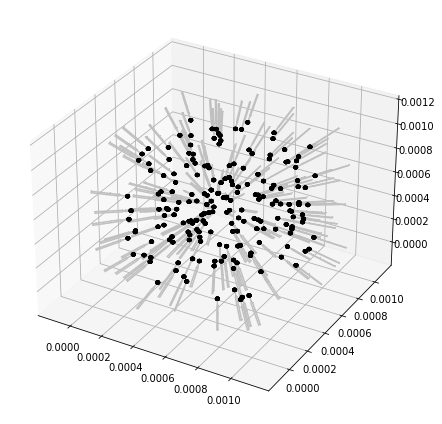

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=True, plot_synapses=False)
pn.close() 